In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.metrics import *
from keras.models import Sequential
from keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow_addons as tfa
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2023-04-23 13:10:03.335052: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 13:10:03.373416: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 13:10:03.374431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 13:10:04.023324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/marco/.local/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of Tens

In [2]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name = 'accuracy'),
           TruePositives(thresholds = 0.5, name = 'tp'),
           TrueNegatives(thresholds = 0.5, name = 'tn'),
           FalsePositives(thresholds = 0.5, name = 'fp'),
           FalseNegatives(thresholds = 0.5, name = 'fn'),
           PrecisionAtRecall(recall = 0.5, name = 'precision'),
           SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           SpecificityAtSensitivity(sensitivity = 0.5,
                              name = 'specificity'),
           Recall(name='recall')]

2023-04-23 13:10:05.766448: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-23 13:10:05.767006: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [1]:
iris = load_iris()
x = iris.data
y = iris.target

NameError: name 'load_iris' is not defined

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [6]:
print(x)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [7]:
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [9]:
model = Sequential([
    Dense(64,
         activation = 'relu',
         input_shape = (4,)),
    Dense(64,
         activation = 'relu'),
    Dropout(0.2),
    Dense(64,
          activation = 'relu'),
    Dropout(0.2),
    Dense(32,
         activation = 'relu'),
    Dense(3,
         activation = 'softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 9

In [11]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy',
                                min_lr = 0.0001,
                                verbose = 1)

In [12]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = [METRICS])

In [13]:
%time

hist = model.fit(X_train,
                y_train,
                steps_per_epoch = 20,
                epochs = 100,
                validation_data = (X_test, y_test),
                callbacks = [learning_rate],
                verbose = 1)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Epoch 1/100
20/20 [==============================] - 2s 30ms/step - loss: 0.9874 - accuracy: 0.6583 - tp: 8.0000 - tn: 240.0000 - fp: 0.0000e+00 - fn: 112.0000 - precision: 0.6897 - sensitivity: 0.8000 - specificity: 0.8875 - recall: 0.0667 - val_loss: 0.8213 - val_accuracy: 0.9000 - val_tp: 10.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 20.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.3333 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.7833 - tp: 51.0000 - tn: 239.0000 - fp: 1.0000 - fn: 69.0000 - precision: 0.9605 - sensitivity: 0.9750 - specificity: 0.9875 - recall: 0.4250 - val_loss: 0.5345 - val_accuracy: 0.8667 - val_tp: 21.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 9.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.7000 - lr: 0.0010
Epoch 

Epoch 19/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9750 - tp: 117.0000 - tn: 237.0000 - fp: 3.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9750 - val_loss: 0.0392 - val_accuracy: 0.9667 - val_tp: 29.0000 - val_tn: 59.0000 - val_fp: 1.0000 - val_fn: 1.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.9667 - lr: 0.0010
Epoch 20/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9583 - tp: 115.0000 - tn: 235.0000 - fp: 5.0000 - fn: 5.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9583 - val_loss: 0.0278 - val_accuracy: 1.0000 - val_tp: 30.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 21/100
20/20 [==============================] - 0s 3ms/step - loss: 

Epoch 36/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9833 - tp: 118.0000 - tn: 238.0000 - fp: 2.0000 - fn: 2.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9833 - val_loss: 0.0152 - val_accuracy: 1.0000 - val_tp: 30.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 37/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9750 - tp: 117.0000 - tn: 237.0000 - fp: 3.0000 - fn: 3.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9750 - val_loss: 0.0134 - val_accuracy: 1.0000 - val_tp: 30.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 38/100
20/20 [==============================] - 0s 3

Epoch 53/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9917 - tp: 119.0000 - tn: 239.0000 - fp: 1.0000 - fn: 1.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9917 - val_loss: 0.0074 - val_accuracy: 1.0000 - val_tp: 30.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 54/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9833 - tp: 118.0000 - tn: 238.0000 - fp: 2.0000 - fn: 2.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9833 - val_loss: 0.0068 - val_accuracy: 1.0000 - val_tp: 30.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 55/100
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9917 - tp: 119.0000 - tn: 239.0000 - fp: 1.0000 - fn: 1.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9917 - val_loss: 0.0052 - val_accuracy: 1.0000 - val_tp: 30.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 88/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9833 - tp: 118.0000 - tn: 238.0000 - fp: 2.0000 - fn: 2.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9833 - val_loss: 0.0051 - val_accuracy: 1.0000 - val_tp: 30.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - los

In [14]:
print(hist.history)

{'loss': [0.9873939156532288, 0.7214483618736267, 0.521289587020874, 0.4143088757991791, 0.35912254452705383, 0.30294671654701233, 0.2693757116794586, 0.21553285419940948, 0.1598740518093109, 0.16456948220729828, 0.1303621083498001, 0.1265038400888443, 0.15169204771518707, 0.12061925232410431, 0.09550883620977402, 0.09759240597486496, 0.08368619531393051, 0.07299748063087463, 0.07147142291069031, 0.09907160699367523, 0.063289113342762, 0.10712099075317383, 0.0747949630022049, 0.08871413767337799, 0.05168197676539421, 0.060068488121032715, 0.05471377447247505, 0.07136817276477814, 0.04937296360731125, 0.04783967509865761, 0.05593482777476311, 0.06143730506300926, 0.07212746888399124, 0.04093899950385094, 0.04071309417486191, 0.03417806699872017, 0.05589849501848221, 0.051356974989175797, 0.06597398221492767, 0.03967975080013275, 0.05000823363661766, 0.05218233913183212, 0.03421013057231903, 0.04217328131198883, 0.054421860724687576, 0.03713066130876541, 0.03887103497982025, 0.0386208146

In [15]:
acc = hist.history['accuracy']
loss = hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv= hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history["recall"][-1]
RECV = hist.history["val_recall"][-1]
LR = hist.history['lr'][-1]

In [16]:
accU10 = np.mean(acc[-10])
tpU10 = np.mean(tp[-10])
fpU10 = np.mean(fp[-10])
tnU10 = np.mean(tn[-10])
fnU10 = np.mean(fn[-10])

print('Média das últimas 10 época de processamento')
print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')
print('-----------------------------------------------')
print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')

Média das últimas 10 época de processamento
Verdadeiros Positivos: 119.0
Falsos Positivos: 1.0
Verdadeiros Negativos: 239.0
Falsos Negativos: 1.0
-----------------------------------------------
Acurácia da Matriz de Confusão: 97.0%


In [17]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)

OACC = (TP+TN)/(TP+FP+FN+TN)
ACCCM = (TP+TN)/(TN + TP + FP + FN)
FM = (2 * PRE * REC)/(PRE + REC)
F1S = 2*((PRE*REC))/(PRE+REC)
F1S2 = 2 * TP/(2 * TP + FP + FN)

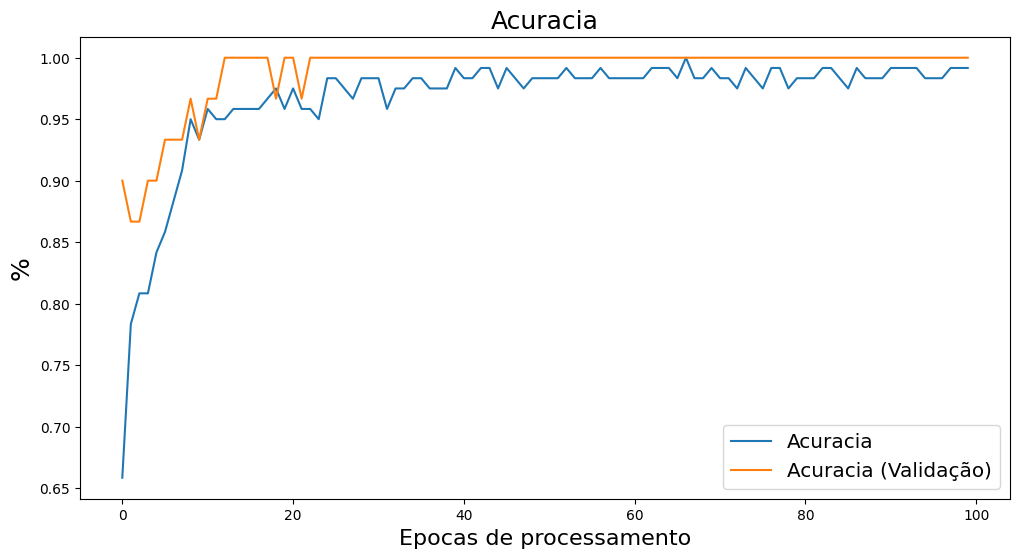

In [18]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
           'Acuracia (Validação)'],
          loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel("%", fontsize = 18)
plt.title('Acuracia', fontsize = 18)
plt.show()

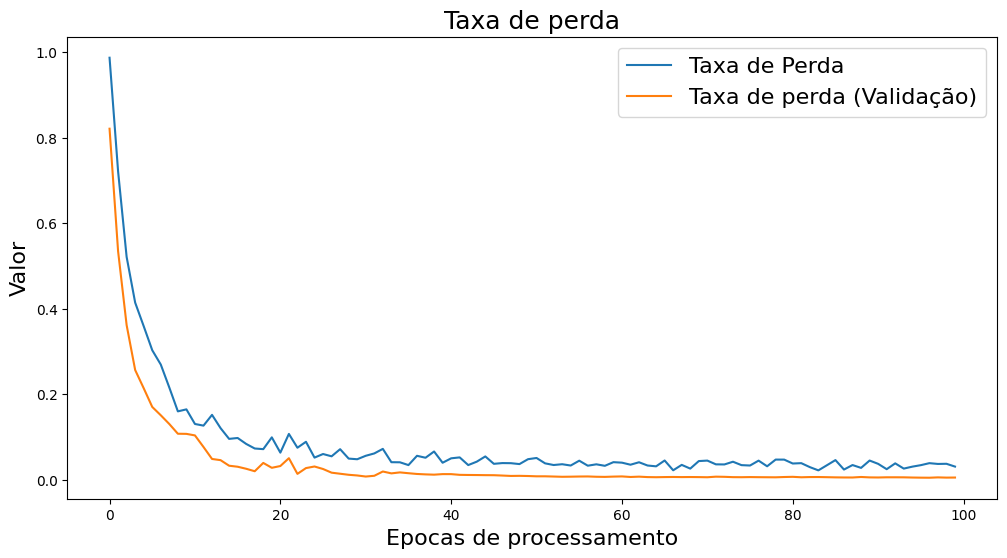

In [19]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
           'Taxa de perda (Validação)'],
          loc = 'upper right', fontsize = 16)
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de perda', fontsize = 18)
plt.show()

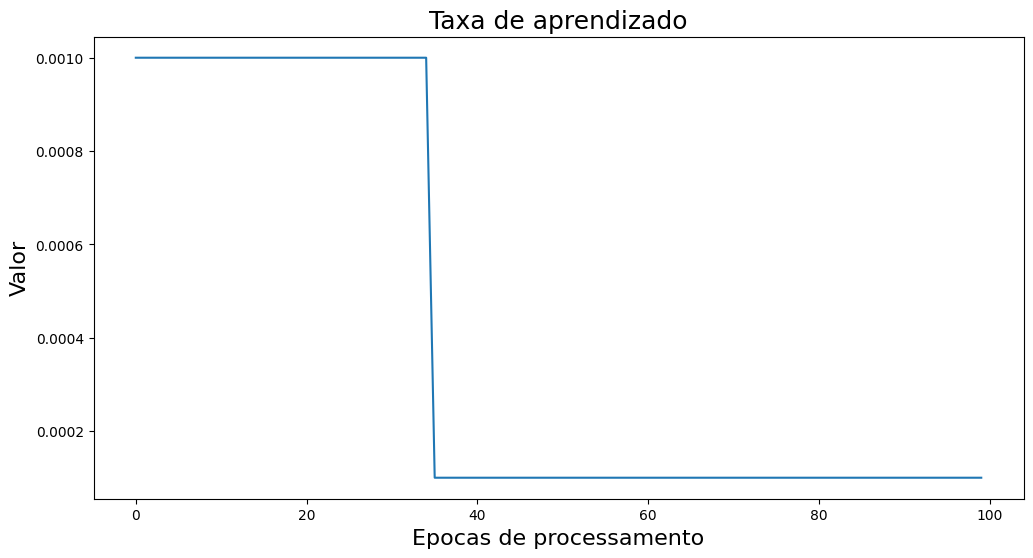

In [20]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['lr'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de aprendizado', fontsize = 18)
plt.show()

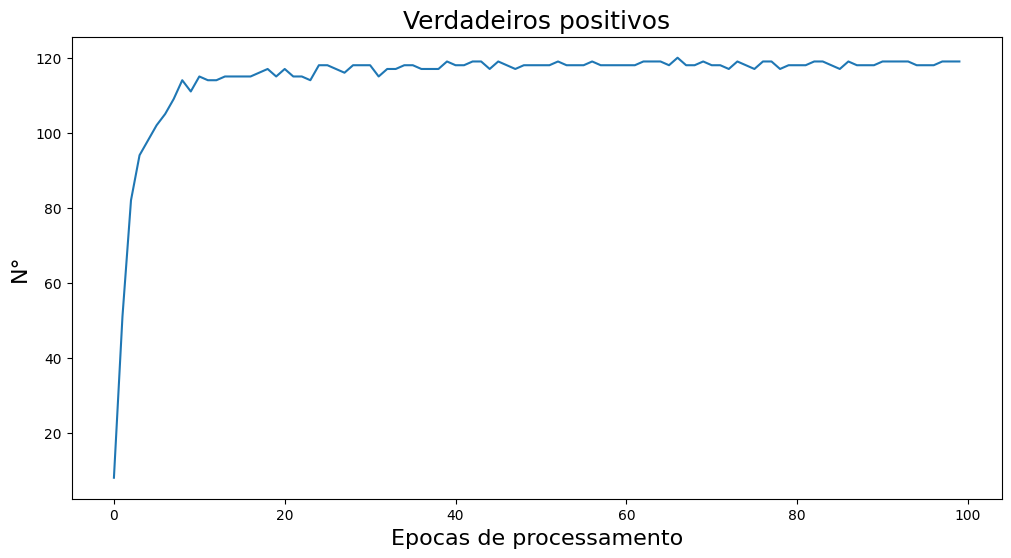

In [21]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros positivos', fontsize = 18)
plt.show()

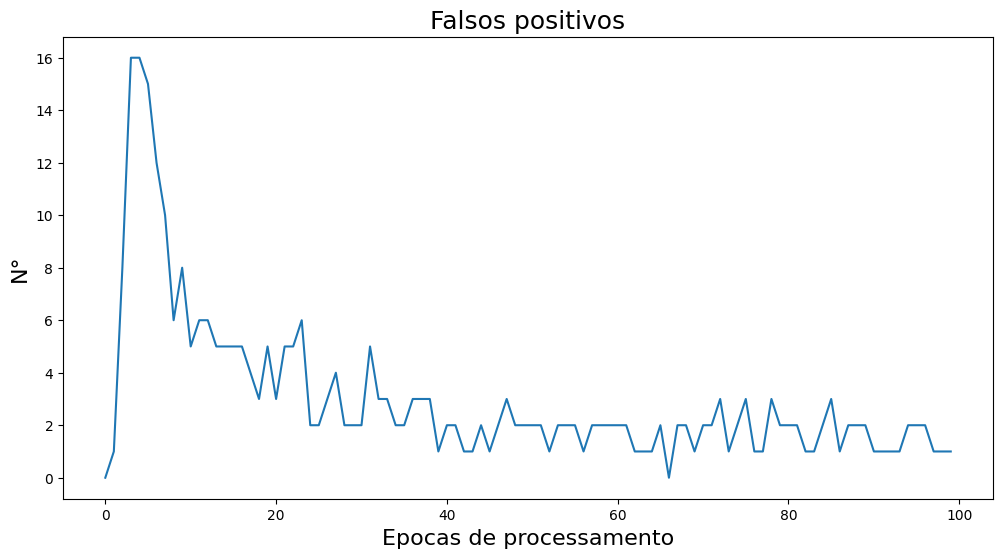

In [22]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Falsos positivos', fontsize = 18)
plt.show()

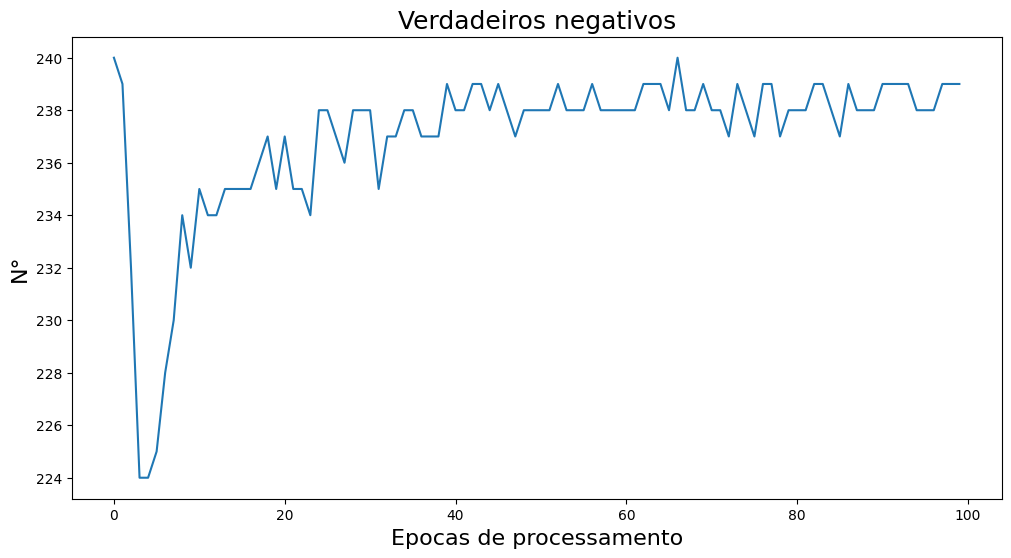

In [23]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros negativos', fontsize = 18)
plt.show()

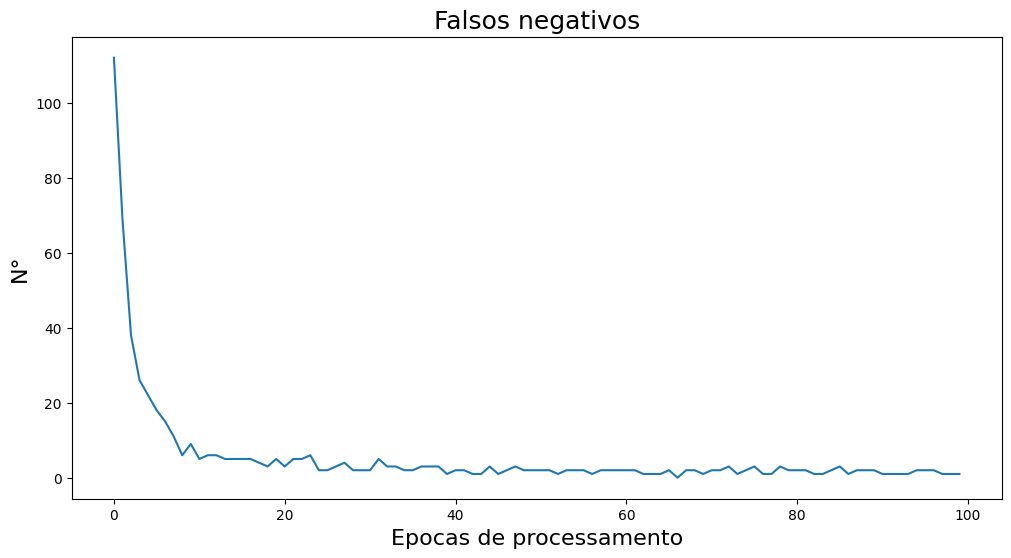

In [24]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Falsos negativos', fontsize = 18)
plt.show()

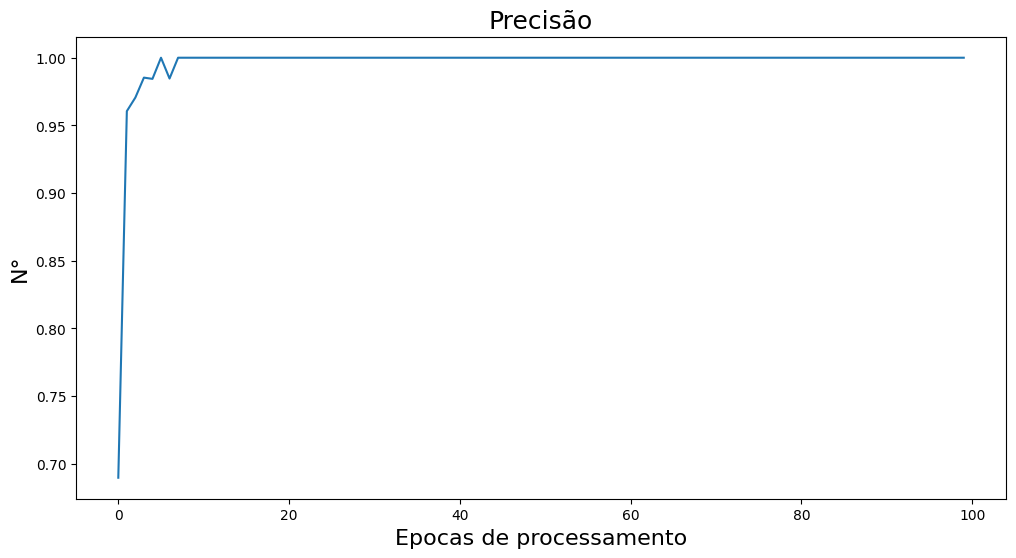

In [25]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()

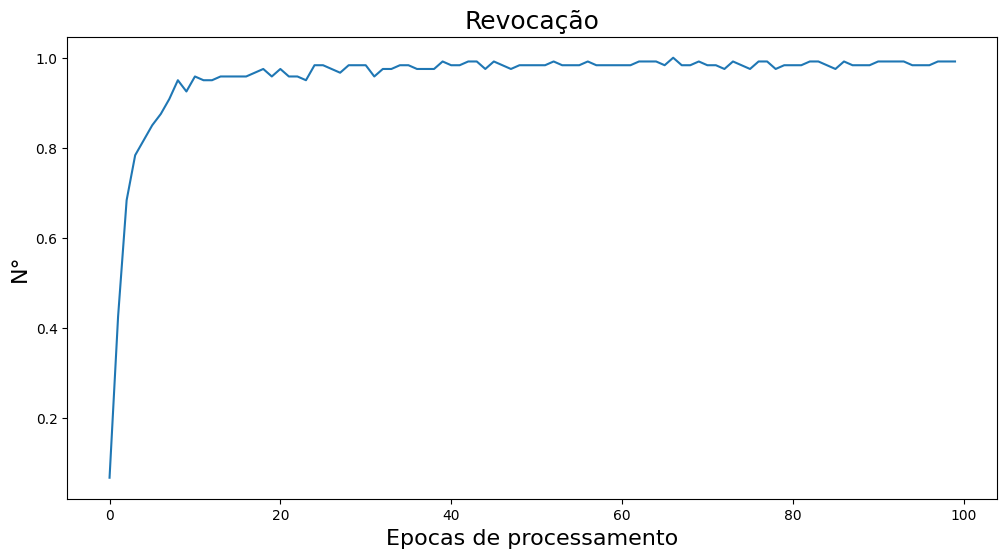

In [26]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Numeros de Positivos e Negativos')

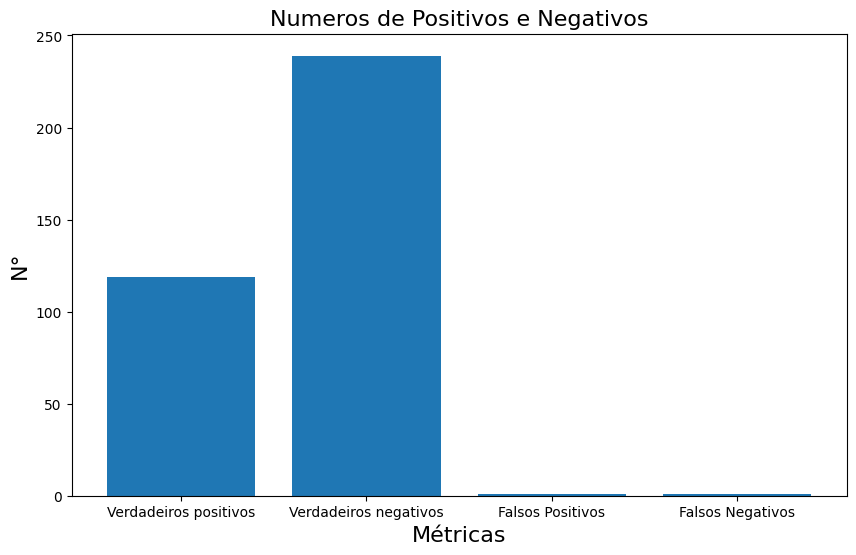

In [27]:
data = {'Verdadeiros positivos': TP,
        'Verdadeiros negativos': TN,
        'Falsos Positivos': FP,
        'Falsos Negativos': FN}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("N°", fontsize = 16)
plt.title("Numeros de Positivos e Negativos", fontsize = 16)

In [28]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]
acc_final = hist.history['accuracy'][-1] * 100

In [29]:
print('RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)')
print('--------------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acuracia Geral: {round(OACC, 2)*100-2}%')
print(f'Acuracia Media (Media ultimas 10 epocas): {round(accU10, 2)*100-2}%')
print(f'Acuracia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acuracia (Validação): {round(ACCV, 2)*100-2}%')
print(f'Taxa de perda: {round(LOSS, 2)}%')
print(f'Taxa de perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisao: {round(PRE, 2)*100-2}%')
print(f'Precisao (Validação): {round(OACC, 2)*100-2}%')
print(f'Revocação: {round(REC, 2)*100-2}%')
print(f'Revocação (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100-2}%')
print(f'F-Score: {round(FM, 2)*100-2}%')
print(f'F1 Score(VP, FP, VN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acuracia da Matriz Confusao: {round(ACCCM, 2)*100}%')
print(f'Taxa de verdadeiros positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros negativos: {round(NPV, 2)*100}%')
print(f'Taxa de falsos positivos: {round(FPR, 2)*100}%')
print(f'Taxa de falsos negativos: {round(FNR, 2)*100}%')
print(f'Dados Invalidos: {round(FDR, 2)*100}%')

RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)
--------------------------------------------
Acuracia Final: 97.17%
Acuracia Geral: 97.0%
Acuracia Media (Media ultimas 10 epocas): 97.0%
Acuracia (Treinamento): 97.0%
Acuracia (Validação): 98.0%
Taxa de perda: 0.03%
Taxa de perda (Validação): 0.01%
Precisao: 98.0%
Precisao (Validação): 97.0%
Revocação: 97.0%
Revocação (Validação): 98.0%
F1 Score: 98.0%
F-Score: 98.0%
F1 Score(VP, FP, VN, FN): 97.0%
Taxa de aprendizado: 9.999999747378752e-05
Sensibilidade: 97.0%
Especificidade: 98.0%
Acuracia da Matriz Confusao: 99.0%
Taxa de verdadeiros positivos: 99.0%
Taxa de Verdadeiros negativos: 100.0%
Taxa de falsos positivos: 0.0%
Taxa de falsos negativos: 1.0%
Dados Invalidos: 1.0%
